In [1]:
import integralclient as ic

In [2]:
import requests
import io
import pandas as pd
import json
import numpy as np

In [3]:
print()

In [4]:
from astropy.time import Time 
import time

In [84]:
Ds = dict()


for i in np.linspace(
    1020.1, 
    Time(time.strftime("%Y-%m-%d %H:%M:%S")).mjd - 51544.,
    1000,
):
    for target in "ACS", "VETO", "SPTI4":
        u = f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/{target}/{i:.20g}/100"    
        print(u)

        try:
            d=pd.read_csv(
                io.StringIO(
                    json.loads(requests.get(u).text)
                ),
                skiprows=5,
                delim_whitespace=True,
                names=["ijd", "t_rel_s", "c", "t"],
            )
            print("i", i, np.nanmean(d.c))
        except:
            print("no", i)
        
        Ds[target] = pd.concat([Ds.get(target, pd.DataFrame()), d])

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1020.1000000000000227/100
no 1020.1
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1020.1000000000000227/100
no 1020.1
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1020.1000000000000227/100
no 1020.1
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1026.6259447062802792/100
no 1026.6259447062803
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1026.6259447062802792/100
no 1026.6259447062803
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1026.6259447062802792/100
no 1026.6259447062803
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1033.1518894125606494/100
no 1033.1518894125606
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/a

i 1144.0929494193267 6690.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1144.0929494193267146/100
no 1144.0929494193267
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1150.6188941256070848/100
i 1150.618894125607 3927.41425
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1150.6188941256070848/100
i 1150.618894125607 6731.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1150.6188941256070848/100
no 1150.618894125607
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1157.1448388318874549/100
i 1157.1448388318875 3765.58375
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1157.1448388318874549/100
i 1157.1448388318875 6856.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1157.1448388318874549/10

i 1268.0858988386535 1.8822114667912264
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1274.6118435449338904/100
i 1274.611843544934 3451.98025
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1274.6118435449338904/100
i 1274.611843544934 6225.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1274.6118435449338904/100
i 1274.611843544934 1.9444654438387776
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1281.1377882512142605/100
i 1281.1377882512143 3508.33075
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1281.1377882512142605/100
i 1281.1377882512143 6275.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1281.1377882512142605/100
i 1281.1377882512143 1.9429297390648417
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integral

i 1392.07884825798 6694.666666666667
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1392.0788482579800984/100
i 1392.07884825798 2.072029322898608
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1398.6047929642604686/100
no 1398.6047929642605
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1398.6047929642604686/100
no 1398.6047929642605
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1398.6047929642604686/100
no 1398.6047929642605
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1405.1307376705408387/100
no 1405.1307376705408
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1405.1307376705408387/100
no 1405.1307376705408
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1405.1307376705408387/100
no 

no 1516.0717976773067
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1516.0717976773066766/100
no 1516.0717976773067
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1522.5977423835870468/100
i 1522.597742383587 3830.5455
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1522.5977423835870468/100
i 1522.597742383587 7083.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1522.5977423835870468/100
i 1522.597742383587 2.3738928617478154
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1529.1236870898674169/100
i 1529.1236870898674 3946.93925
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1529.1236870898674169/100
i 1529.1236870898674 7445.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1529.12368708

no 1640.0647470966335
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1640.0647470966334822/100
i 1640.0647470966335 2.7310109018830526
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1646.5906918029138524/100
i 1646.5906918029139 4337.36975
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1646.5906918029138524/100
i 1646.5906918029139 8531.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1646.5906918029138524/100
i 1646.5906918029139 5.103480342692071
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1653.1166365091942225/100
i 1653.1166365091942 4380.595629889399
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1653.1166365091942225/100
i 1653.1166365091942 8841.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1

no 1764.0576965159603
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1764.0576965159602878/100
no 1764.0576965159603
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1764.0576965159602878/100
no 1764.0576965159603
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1770.583641222240658/100
i 1770.5836412222407 4561.2365
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1770.583641222240658/100
i 1770.5836412222407 9189.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1770.583641222240658/100
i 1770.5836412222407 5.49645305985338
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1777.1095859285210281/100
i 1777.109585928521 9392.927
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1777.1095859285210281/100

i 1888.0506459352869 4402.2775
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1888.050645935286866/100
i 1888.0506459352869 8730.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1888.050645935286866/100
i 1888.0506459352869 5.525217735550277
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1894.5765906415672362/100
i 1894.5765906415672 4349.2935
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1894.5765906415672362/100
i 1894.5765906415672 8612.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1894.5765906415672362/100
i 1894.5765906415672 5.528098110968252
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1901.1025353478476063/100
i 1901.1025353478476 4407.8195
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/

i 2005.517650648333 2.1568584771252177
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2012.0435953546134442/100
i 2012.0435953546134 4608.215
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2012.0435953546134442/100
i 2012.0435953546134 9437.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2012.0435953546134442/100
i 2012.0435953546134 2.0773430391264784
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2018.5695400608938144/100
no 2018.5695400608938
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2018.5695400608938144/100
no 2018.5695400608938
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2018.5695400608938144/100
no 2018.5695400608938
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2025.0954847

i 2129.51060006766 2.084778305621536
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2136.0365447739404772/100
i 2136.0365447739405 4601.3075
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2136.0365447739404772/100
i 2136.0365447739405 9395.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2136.0365447739404772/100
i 2136.0365447739405 2.1105388193487853
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2142.5624894802208473/100
i 2142.562489480221 4717.3525
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2142.5624894802208473/100
i 2142.562489480221 9805.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2142.5624894802208473/100
i 2142.562489480221 2.1187350244559298
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/ap

i 2253.5035494869867 10687.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2253.5035494869866852/100
i 2253.5035494869867 35.90828589500316
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2260.0294941932670554/100
i 2260.029494193267 5092.846
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2260.0294941932670554/100
i 2260.029494193267 10845.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2260.0294941932670554/100
i 2260.029494193267 2.2991795986952654
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2266.5554388995474255/100
no 2266.5554388995474
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2266.5554388995474255/100
no 2266.5554388995474
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2266.

i 2377.4964989063133 5315.0935
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2377.4964989063132634/100
i 2377.4964989063133 11455.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2377.4964989063132634/100
i 2377.4964989063133 4.763082778306375
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2384.0224436125936336/100
i 2384.0224436125936 5113.1245
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2384.0224436125936336/100
i 2384.0224436125936 11024.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2384.0224436125936336/100
i 2384.0224436125936 4.59434634571225
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2390.5483883188740037/100
i 2390.548388318874 5264.919
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2501.4894483256398416/100
i 2501.48944832564 5448.355
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2501.4894483256398416/100
i 2501.48944832564 12032.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2501.4894483256398416/100
i 2501.48944832564 4.96038348783773
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2508.0153930319202118/100
i 2508.01539303192 5268.9925
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2508.0153930319202118/100
i 2508.01539303192 11555.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2508.0153930319202118/100
i 2508.01539303192 4.791022443890275
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2514.541337738200582/100
no 251

i 2618.9564530386865 4.970267278190732
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2625.4823977449668746/100
no 2625.482397744967
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2625.4823977449668746/100
no 2625.482397744967
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2625.4823977449668746/100
no 2625.482397744967
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2632.0083424512472448/100
i 2632.0083424512472 5489.5815
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2632.0083424512472448/100
i 2632.0083424512472 11983.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2632.0083424512472448/100
i 2632.0083424512472 4.930398289650804
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2638.534287157

i 2742.949402458013 5.130155380778822
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2749.4753471642934528/100
i 2749.4753471642935 5689.0895
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2749.4753471642934528/100
i 2749.4753471642935 12760.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2749.4753471642934528/100
i 2749.4753471642935 5.070987654320987
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2756.001291870573823/100
i 2756.001291870574 5802.79
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2756.001291870573823/100
i 2756.001291870574 13115.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2756.001291870573823/100
i 2756.001291870574 5.15317598606051
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.

i 2866.9423518773397 13831.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2866.9423518773396609/100
i 2866.9423518773397 5.262724610148025
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2873.468296583620031/100
no 2873.46829658362
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2873.468296583620031/100
no 2873.46829658362
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2873.468296583620031/100
no 2873.46829658362
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2879.9942412899004012/100
i 2879.9942412899004 5693.924
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2879.9942412899004012/100
i 2879.9942412899004 12839.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2879.9942412899004012/100
i 2

i 2990.9353012966662 12883.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2990.9353012966662391/100
i 2990.9353012966662 5.091174843959864
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/2997.4612460029466092/100
i 2997.4612460029466 5747.6095
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/2997.4612460029466092/100
i 2997.4612460029466 13146.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/2997.4612460029466092/100
i 2997.4612460029466 5.14085621587402
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3003.9871907092269794/100
i 3003.987190709227 5796.7485614210655
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3003.9871907092269794/100
i 3003.987190709227 13187.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/a

i 3114.928250715993 5860.9795
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3114.9282507159928173/100
i 3114.928250715993 13406.333333333334
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3114.9282507159928173/100
i 3114.928250715993 5.225885709756677
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3121.4541954222731874/100
i 3121.454195422273 5819.8985
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3121.4541954222731874/100
i 3121.454195422273 13280.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3121.4541954222731874/100
i 3121.454195422273 5.209503411074092
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3127.9801401285535576/100
no 3127.9801401285536
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/

i 3232.3952554290395 5.618043443792612
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3238.9212001353198502/100
i 3238.92120013532 6091.831
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3238.9212001353198502/100
i 3238.92120013532 14018.666666666666
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3238.9212001353198502/100
i 3238.92120013532 5.4088783194609595
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3245.4471448416002204/100
i 3245.4471448416 6126.2285
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3245.4471448416002204/100
i 3245.4471448416 14146.666666666666
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3245.4471448416002204/100
i 3245.4471448416 5.417710480418583
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//i

i 3356.388204848366 15053.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3356.3882048483660583/100
i 3356.388204848366 5.61207511290706
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3362.9141495546464284/100
i 3362.9141495546464 6296.731
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3362.9141495546464284/100
i 3362.9141495546464 14678.666666666666
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3362.9141495546464284/100
i 3362.9141495546464 5.586277927428299
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3369.4400942609267986/100
i 3369.440094260927 6279.2665
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3369.4400942609267986/100
i 3369.440094260927 14697.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/ap

i 3480.3811542676926 6450.295
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3480.3811542676926365/100
i 3480.3811542676926 15294.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3480.3811542676926365/100
i 3480.3811542676926 5.65968253968254
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3486.9070989739730067/100
no 3486.907098973973
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3486.9070989739730067/100
no 3486.907098973973
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3486.9070989739730067/100
no 3486.907098973973
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3493.4330436802533768/100
i 3493.4330436802534 6435.141
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3493.4330436802533768/10

i 3597.8481589807393 5.685551059271602
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3604.3741036870196695/100
i 3604.3741036870197 6532.8395
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3604.3741036870196695/100
i 3604.3741036870197 15303.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3604.3741036870196695/100
i 3604.3741036870197 5.7363578680203045
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3610.9000483932995849/100
i 3610.9000483932996 6549.4235
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3610.9000483932995849/100
i 3610.9000483932996 15619.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3610.9000483932995849/100
i 3610.9000483932996 5.796175817200889
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integra

i 3721.841108400066 14241.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3721.8411084000658775/100
i 3721.841108400066 5.541587452471483
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3728.3670531063462477/100
i 3728.3670531063462 6110.211
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3728.3670531063462477/100
i 3728.3670531063462 14144.666666666666
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3728.3670531063462477/100
i 3728.3670531063462 5.474681036532213
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3734.8929978126266178/100
i 3734.8929978126266 6109.927
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3734.8929978126266178/100
i 3734.8929978126266 14414.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/

no 3845.8340578193925
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3845.8340578193924557/100
no 3845.8340578193925
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3845.8340578193924557/100
no 3845.8340578193925
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3852.3600025256728259/100
i 3852.360002525673 5929.911
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3852.3600025256728259/100
i 3852.360002525673 13691.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3852.3600025256728259/100
i 3852.360002525673 5.421044303797468
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3858.885947231953196/100
i 3858.885947231953 5861.804
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3858.885947231953196/100


i 3963.3010625324387 5.345501285347043
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3969.8270072387190339/100
i 3969.827007238719 5675.053
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3969.8270072387190339/100
i 3969.827007238719 12845.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3969.8270072387190339/100
i 3969.827007238719 5.263720598717035
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/3976.3529519449994041/100
i 3976.3529519449994 5574.483
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/3976.3529519449994041/100
i 3976.3529519449994 12500.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/3976.3529519449994041/100
i 3976.3529519449994 5.19609239044455
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api

i 4087.2940119517657 11482.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4087.2940119517656967/100
i 4087.2940119517657 4.962264150943396
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4093.8199566580460669/100
i 4093.819956658046 5404.2165
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4093.8199566580460669/100
i 4093.819956658046 11950.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4093.8199566580460669/100
i 4093.819956658046 5.041864514086736
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4100.3459013643268918/100
no 4100.345901364327
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4100.3459013643268918/100
no 4100.345901364327
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4100.34

i 4211.286961371093 10688.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4211.2869613710927297/100
i 4211.286961371093 4.778244002850131
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4217.8129060773726451/100
i 4217.812906077373 5016.8225
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4217.8129060773726451/100
i 4217.812906077373 10783.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4217.8129060773726451/100
i 4217.812906077373 4.885109419600381
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4224.33885078365347/100
i 4224.3388507836535 5072.086
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4224.33885078365347/100
i 4224.3388507836535 10995.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SP

i 4335.279910790419 10737.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4335.2799107904193079/100
i 4335.279910790419 4.859053497942387
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4341.8058554966992233/100
i 4341.805855496699 5086.5965
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4341.8058554966992233/100
i 4341.805855496699 11085.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4341.8058554966992233/100
i 4341.805855496699 4.936595778322397
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4348.3318002029800482/100
no 4348.33180020298
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4348.3318002029800482/100
no 4348.33180020298
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4348.331800

no 4459.272860209746
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4459.2728602097458861/100
no 4459.272860209746
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4465.7988049160258015/100
i 4465.798804916026 4892.679
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4465.7988049160258015/100
i 4465.798804916026 9961.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4465.7988049160258015/100
i 4465.798804916026 4.980375089024294
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4472.3247496223066264/100
i 4472.324749622307 4913.1015
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4472.3247496223066264/100
i 4472.324749622307 10348.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4472.32474962230662

i 4583.2658096290725 13020.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4583.2658096290724643/100
i 4583.2658096290725 4.956450287592441
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4589.7917543353532892/100
i 4589.791754335353 7474.8845
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4589.7917543353532892/100
i 4589.791754335353 32229.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4589.7917543353532892/100
i 4589.791754335353 5.852574783781639
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4596.3176990416332046/100
i 4596.317699041633 4522.1095
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4596.3176990416332046/100
i 4596.317699041633 9609.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genl

no 4707.258759048399
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4707.2587590483990425/100
no 4707.258759048399
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4713.7847037546798674/100
i 4713.78470375468 4236.7465
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4713.7847037546798674/100
i 4713.78470375468 8381.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4713.7847037546798674/100
i 4713.78470375468 4.309723320158103
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4720.3106484609597828/100
i 4720.31064846096 4286.01
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4720.3106484609597828/100
i 4720.31064846096 8680.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4720.3106484609597828/100


i 4831.251708467726 8762.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4831.2517084677256207/100
i 4831.251708467726 4.259843143468272
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4837.7776531740064456/100
i 4837.777653174006 4423.292
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4837.7776531740064456/100
i 4837.777653174006 9071.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4837.7776531740064456/100
i 4837.777653174006 4.3160145731031205
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4844.303597880286361/100
i 4844.303597880286 4501.0155
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4844.303597880286361/100
i 4844.303597880286 9221.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI

i 4955.244657887052 4144.2655
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4955.2446578870521989/100
i 4955.244657887052 8363.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4955.2446578870521989/100
i 4955.244657887052 4.025513033832501
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4961.7706025933330238/100
no 4961.770602593333
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4961.7706025933330238/100
no 4961.770602593333
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/4961.7706025933330238/100
no 4961.770602593333
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/4968.2965472996129392/100
no 4968.296547299613
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/4968.2965472996129392/100
no 4968.2

i 5079.23760730638 4060.05725
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5079.2376073063796866/100
i 5079.23760730638 7846.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5079.2376073063796866/100
i 5079.23760730638 4.055375365872953
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5085.763552012659602/100
i 5085.76355201266 3944.89625
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5085.763552012659602/100
i 5085.76355201266 7645.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5085.763552012659602/100
i 5085.76355201266 4.049461855017411
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5092.2894967189404269/100
i 5092.28949671894 3891.60275
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5

i 5203.230556725706 4000.89
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5203.2305567257062648/100
i 5203.230556725706 7917.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5203.2305567257062648/100
i 5203.230556725706 3.8994139078092824
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5209.7565014319861803/100
i 5209.756501431986 3921.28075
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5209.7565014319861803/100
i 5209.756501431986 7654.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5209.7565014319861803/100
i 5209.756501431986 3.8620388734629114
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5216.2824461382670052/100
i 5216.282446138267 3949.16075
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/gen

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5327.2235061450328431/100
i 5327.223506145033 4166.04925
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5327.2235061450328431/100
i 5327.223506145033 8360.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5327.2235061450328431/100
i 5327.223506145033 4.083537888985668
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5333.749450851313668/100
i 5333.749450851314 4092.38175
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5333.749450851313668/100
i 5333.749450851314 8052.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5333.749450851313668/100
i 5333.749450851314 4.005534034311013
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5340.2753955575935834/100


i 5444.6905108580795 4.28558979640339
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5451.2164555643594213/100
i 5451.216455564359 4090.60075
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5451.2164555643594213/100
i 5451.216455564359 8205.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5451.2164555643594213/100
i 5451.216455564359 4.017336922102596
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5457.7424002706402462/100
i 5457.74240027064 4086.65375
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5457.7424002706402462/100
i 5457.74240027064 8314.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5457.7424002706402462/100
i 5457.74240027064 4.031051964512041
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.

i 5568.683460277406 3.8591772151898733
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5575.2094049836859995/100
i 5575.209404983686 4050.56725
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5575.2094049836859995/100
i 5575.209404983686 8023.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5575.2094049836859995/100
i 5575.209404983686 3.869355015932315
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5581.7353496899668244/100
i 5581.735349689967 3873.24675
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5581.7353496899668244/100
i 5581.735349689967 7506.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5581.7353496899668244/100
i 5581.735349689967 3.8278884462151392
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/ap

i 5692.676409696733 4.202803294266709
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5699.2023544030125777/100
i 5699.202354403013 4433.4015
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5699.2023544030125777/100
i 5699.202354403013 9144.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5699.2023544030125777/100
i 5699.202354403013 4.171362988760488
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5705.7282991092934026/100
i 5705.728299109293 4266.8705
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5705.7282991092934026/100
i 5705.728299109293 8703.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5705.7282991092934026/100
i 5705.728299109293 4.145894254327037
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1

no 5816.669359116059
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5823.1953038223400654/100
i 5823.19530382234 4519.767
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5823.1953038223400654/100
i 5823.19530382234 9356.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5823.1953038223400654/100
i 5823.19530382234 4.329716458102329
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5829.7212485286199808/100
i 5829.72124852862 4560.6435
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5829.7212485286199808/100
i 5829.72124852862 9619.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5829.7212485286199808/100
i 5829.72124852862 4.35767522993974
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5836.2471932

i 5940.662308535386 11194.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5940.6623085353858187/100
i 5940.662308535386 4.835761799176433
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5947.1882532416666436/100
no 5947.188253241667
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5947.1882532416666436/100
no 5947.188253241667
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5947.1882532416666436/100
no 5947.188253241667
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/5953.714197947946559/100
i 5953.714197947947 5166.685
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/5953.714197947946559/100
i 5953.714197947947 11246.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/5953.714197947946559/100
i 59

i 6064.655257954712 11548.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6064.6552579547123969/100
i 6064.655257954712 4.803823576074885
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6071.1812026609932218/100
i 6071.181202660993 5263.477
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6071.1812026609932218/100
i 6071.181202660993 11533.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6071.1812026609932218/100
i 6071.181202660993 4.847986072643824
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6077.7071473672731372/100
i 6077.707147367273 5275.0055
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6077.7071473672731372/100
i 6077.707147367273 11945.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/

i 6188.64820737404 12926.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6188.6482073740398846/100
i 6188.64820737404 5.168624027932074
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6195.1741520803198/100
i 6195.17415208032 5881.81
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6195.1741520803198/100
i 6195.17415208032 13672.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6195.1741520803198/100
i 6195.17415208032 5.2846738442051935
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6201.7000967865997154/100
i 6201.7000967866 5589.8685
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6201.7000967865997154/100
i 6201.7000967866 12466.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6201.7000967

i 6312.6411567933665 13960.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6312.6411567933664628/100
i 6312.6411567933665 5.3330170777988615
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6319.1671014996463782/100
no 6319.167101499646
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6319.1671014996463782/100
no 6319.167101499646
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6319.1671014996463782/100
no 6319.167101499646
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6325.6930462059272031/100
i 6325.693046205927 5665.7785
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6325.6930462059272031/100
i 6325.693046205927 12923.666666666666
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6325.6930462

i 6436.634106212693 5744.575
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6436.634106212693041/100
i 6436.634106212693 13327.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6436.634106212693041/100
i 6436.634106212693 5.245035208481684
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6443.1600509189729564/100
i 6443.160050918973 5447.3695
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6443.1600509189729564/100
i 6443.160050918973 12259.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6443.1600509189729564/100
i 6443.160050918973 5.1505857294994675
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6449.6859956252537813/100
no 6449.685995625254
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/644

i 6560.62705563202 5956.8175
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6560.6270556320196192/100
i 6560.62705563202 13814.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6560.6270556320196192/100
i 6560.62705563202 5.348894348894349
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6567.1530003382995346/100
i 6567.1530003382995 6167.118
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6567.1530003382995346/100
i 6567.1530003382995 14614.666666666666
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6567.1530003382995346/100
i 6567.1530003382995 5.50487592166812
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6573.6789450445803595/100
i 6573.67894504458 5948.7365
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/

i 6684.620005051346 6022.956
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6684.6200050513461974/100
i 6684.620005051346 14079.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6684.6200050513461974/100
i 6684.620005051346 5.535255902392648
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6691.1459497576270223/100
i 6691.145949757627 6048.457
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6691.1459497576270223/100
i 6691.145949757627 14278.333333333334
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6691.1459497576270223/100
i 6691.145949757627 5.520395550061805
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6697.6718944639069377/100
i 6697.671894463907 6103.1765
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api

i 6802.087009764393 5.627516246631796
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6808.6129544706727756/100
no 6808.612954470673
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6808.6129544706727756/100
no 6808.612954470673
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6808.6129544706727756/100
no 6808.612954470673
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6815.1388991769536005/100
i 6815.138899176954 6224.7385
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6815.1388991769536005/100
i 6815.138899176954 14726.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6815.1388991769536005/100
i 6815.138899176954 5.631878557874763
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6821.6648438832335

i 6926.079959183719 5.668617989083142
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6932.6059038899993539/100
i 6932.605903889999 6451.4595
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6932.6059038899993539/100
i 6932.605903889999 15501.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6932.6059038899993539/100
i 6932.605903889999 5.80943709920038
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6939.1318485962801788/100
no 6939.13184859628
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/6939.1318485962801788/100
no 6939.13184859628
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/6939.1318485962801788/100
no 6939.13184859628
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/6945.6577933025600942/

i 7050.072908603046 2.9131451676841356
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7056.5988533093259321/100
i 7056.598853309326 6417.523
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7056.5988533093259321/100
i 7056.598853309326 15337.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7056.5988533093259321/100
i 7056.598853309326 2.925389710840506
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7063.124798015606757/100
i 7063.124798015607 6315.8635
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7063.124798015606757/100
i 7063.124798015607 15198.666666666666
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7063.124798015606757/100
i 7063.124798015607 2.8662225922842075
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integr

no 7174.065858022373
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7180.5918027286534198/100
i 7180.591802728653 6482.059
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7180.5918027286534198/100
i 7180.591802728653 15825.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7180.5918027286534198/100
i 7180.591802728653 2.9518786298447317
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7187.1177474349333352/100
i 7187.117747434933 6401.167
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7187.1177474349333352/100
i 7187.117747434933 15218.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7187.1177474349333352/100
no 7187.117747434933
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7193.643692141214160

no 7298.058807441699
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7304.584752147979998/100
i 7304.58475214798 6541.5235
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7304.584752147979998/100
i 7304.58475214798 15514.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7304.584752147979998/100
no 7304.58475214798
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7311.1106968542599134/100
no 7311.11069685426
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7311.1106968542599134/100
no 7311.11069685426
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7311.1106968542599134/100
no 7311.11069685426
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7317.6366415605407383/100
i 7317.636641560541 6560.1955
https

i 7428.577701567307 6822.904
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7428.5777015673065762/100
i 7428.577701567307 15770.5
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7428.5777015673065762/100
no 7428.577701567307
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7435.1036462735864916/100
i 7435.1036462735865 6743.8341748604835
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7435.1036462735864916/100
i 7435.1036462735865 16027.0
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/7435.1036462735864916/100
i 7435.1036462735865 3.0841386470729173
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/7441.6295909798673165/100
no 7441.629590979867
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/7441.6

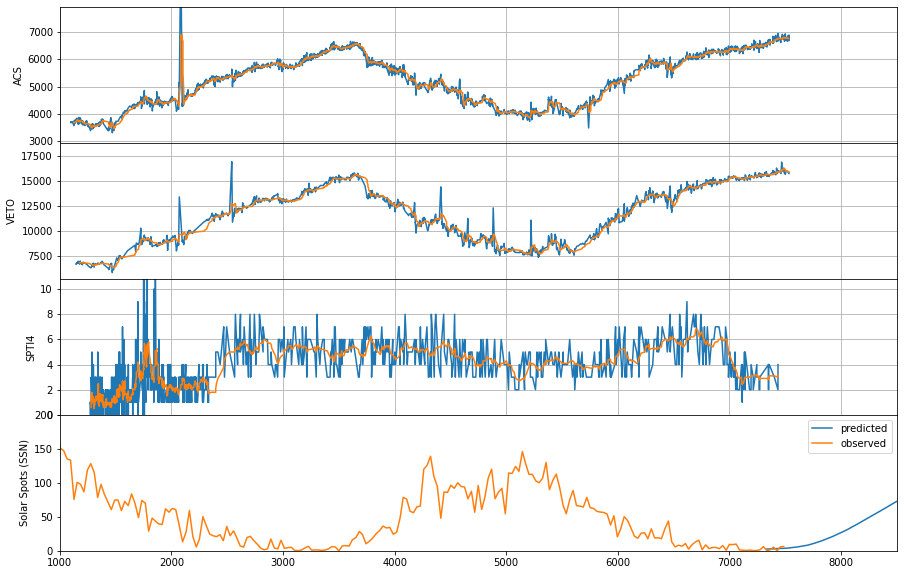

In [165]:
import matplotlib.pylab as plt

f, axes = plt.subplots(
    len(Ds)+1,
    figsize=(15,10),
    sharex=True,
)

plt.subplots_adjust(hspace=0)

for ax, (k, D) in zip(axes[:-1], Ds.items()):
    D = D[::10]
    
    #D.reset_index(inplace=True)
    nots = D.c.str.contains('not')
    m=nots.isna() 

    N,n = dict(
        ACS=(1000, 1),
        VETO=(1, 1),
        SPTI4=(10000, 100),
    )[k]

    D=Ds[k][::N]
    nots = D.c.str.contains('not')
    m=nots.isna() 
    R=D[m].c.rolling(window=30)
    M=R.mean()
    S=R.std()
    S[S<=0]=1e-5

    m_s = ((D[m].c - M)/S).abs()<1

    ax.plot(
        D[m].ijd[m_s],
        D[m].c[m_s],
    )
    
    ax.plot(
        D[m].ijd[m_s],
        D[m].c[m_s].rolling(window=10).mean(),
    )


    ax.set_ylabel(k)
    
    ax.set_ylim([
        np.percentile(D.c[m],5)*0.8,
        np.percentile(D.c[m],95)*1.2
    ])
    ax.grid(True)
    
axes[-1].plot(
    solar_pred_d.ijd,
    solar_pred_d.ssn,
    label="predicted"
)

axes[-1].plot(
    solar_obs_d.ijd,
    solar_obs_d.ssn,
    label="observed"
)

axes[-1].legend()
axes[-1].set_ylabel('Solar Spots (SSN)')

axes[-1].set_ylim([0,200])

plt.xlim([1000, 8500])

plt.savefig("INTEGRAL")

In [76]:
solar_obs = requests.get("https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json").json()
solar_pred = requests.get("https://services.swpc.noaa.gov/json/solar-cycle/predicted-solar-cycle.json").json()

def solar_d(l):
    return pd.DataFrame([
        dict(
            ijd=Time(e['time-tag']+"-01 00:00:00").mjd - 51544,
            ssn=e.get('ssn', e.get('predicted_ssn')),
        )
            for e in l if e['time-tag'].startswith("20")
    ])
    
solar_obs_d = solar_d(solar_obs)
solar_pred_d = solar_d(solar_pred)